# OpenAQ Air Quality Analysis
## Introduction
<text>

## Prerequisite Packages Installation

## Module Importation

In [4]:
import requests
import pandas as pd
from time import sleep
import matplotlib.pyplot as plt

## Data Retrieval

## Data Cleaning

### Plotting Line Graph

In [5]:
df = pd.read_csv("../data/Lublin_20_February_2024_to_20_March_2024.csv")

df.head(5)

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,10528,"Lublin, ul. Obywatelska",co,210.0,µg/m³,2024-02-20T01:00:00+00:00,2024-02-20T02:00:00+01:00,Europe/Warsaw,51.259431,22.569133,NaN,NaN,NaN,Unknown Governmental Organization,GIOS
1,10528,"Lublin, ul. Obywatelska",co,190.0,µg/m³,2024-02-20T02:00:00+00:00,2024-02-20T03:00:00+01:00,Europe/Warsaw,51.259431,22.569133,NaN,NaN,NaN,Unknown Governmental Organization,GIOS
2,10528,"Lublin, ul. Obywatelska",co,180.0,µg/m³,2024-02-20T03:00:00+00:00,2024-02-20T04:00:00+01:00,Europe/Warsaw,51.259431,22.569133,NaN,NaN,NaN,Unknown Governmental Organization,GIOS
3,10528,"Lublin, ul. Obywatelska",co,190.0,µg/m³,2024-02-20T04:00:00+00:00,2024-02-20T05:00:00+01:00,Europe/Warsaw,51.259431,22.569133,NaN,NaN,NaN,Unknown Governmental Organization,GIOS
4,10528,"Lublin, ul. Obywatelska",co,190.0,µg/m³,2024-02-20T05:00:00+00:00,2024-02-20T06:00:00+01:00,Europe/Warsaw,51.259431,22.569133,NaN,NaN,NaN,Unknown Governmental Organization,GIOS


## Data Exploration

### Plotting Box Plot Function
A generic function that displays a box plot with disaggregation by a categorical variable

In [6]:
def plot_boxplot(df, x, y, legend=None):
  """
  Plots a box plot of the specified data, optionally displaying actual parameter names on the x-axis.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      x (str): The column name for the x-axis (grouping variable).
      y (str): The column name for the quantitative variable to plot.
      legend (str, optional): The column name containing parameter names (for labeling). Defaults to None.
  """

  plt.figure(figsize=(8, 6))  # Adjust figure size as needed

  plt.boxplot(
      [df[df[x] == group][y] for group in df[x].unique()]
  )  # Ensure correct data structure for boxplot
  
  if legend is not None:  # Check if legend column is provided
      # Use actual parameter names for x-axis labels (assuming legend values correspond to groups)
      x_labels = df[legend].unique()
      x_labels = [label.upper() for label in x_labels]
      plt.xticks(range(1, len(x_labels) + 1), x_labels)  # Set custom x-axis labels and positions
  else:
      # Default behavior: Use original x-axis values (assuming numerical)
      plt.xlabel(x.capitalize())

  plt.ylabel(y.capitalize())
  plt.title(f'Box Plot of {y.capitalize()} by {x.capitalize()}')
  plt.tight_layout()
  plt.show()

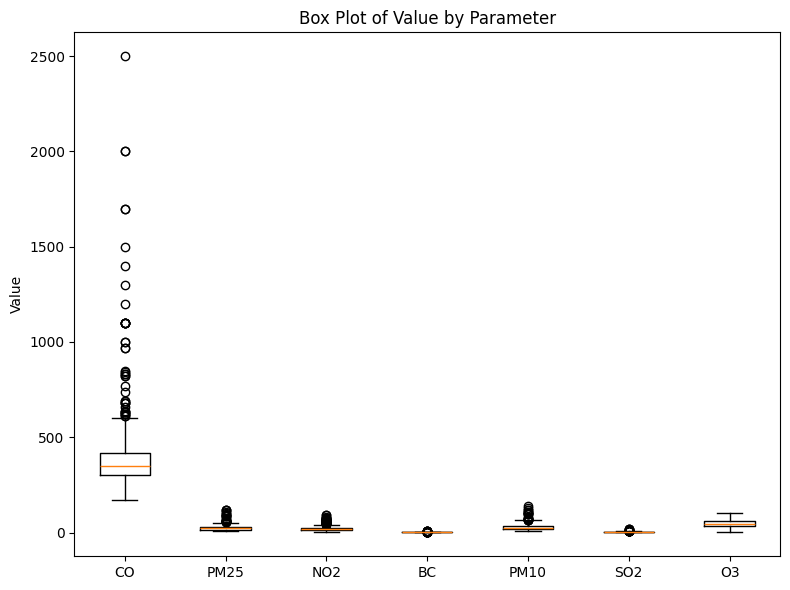

In [7]:
x = 'parameter'
y = 'value'
legend = 'parameter'

plot_boxplot(df, x, y, legend)

## Data Visualisation

### Plotting Line Graph Function
A generic function that draws a line graph with disaggregation by a categorical variable.

In [7]:
def plot_line_graph(df, x_axis, y_axis, legend):
    """
    Plots a line graph of every value disaggregated by the 'parameter' column.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
    """

    plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
    for parameter in df[legend].unique():
        df_filtered = df[df[legend] == parameter]
        plt.plot(df_filtered[x_axis], df_filtered[y_axis], label=parameter)  # Use 'date/time' or appropriate column

    plt.xlabel(x_axis.capitalize())  # Use 'date/time' or appropriate column
    plt.ylabel(y_axis.capitalize())
    plt.title(f'Line Graph Disaggregated by {legend.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Lublin Air Quality Line Graph

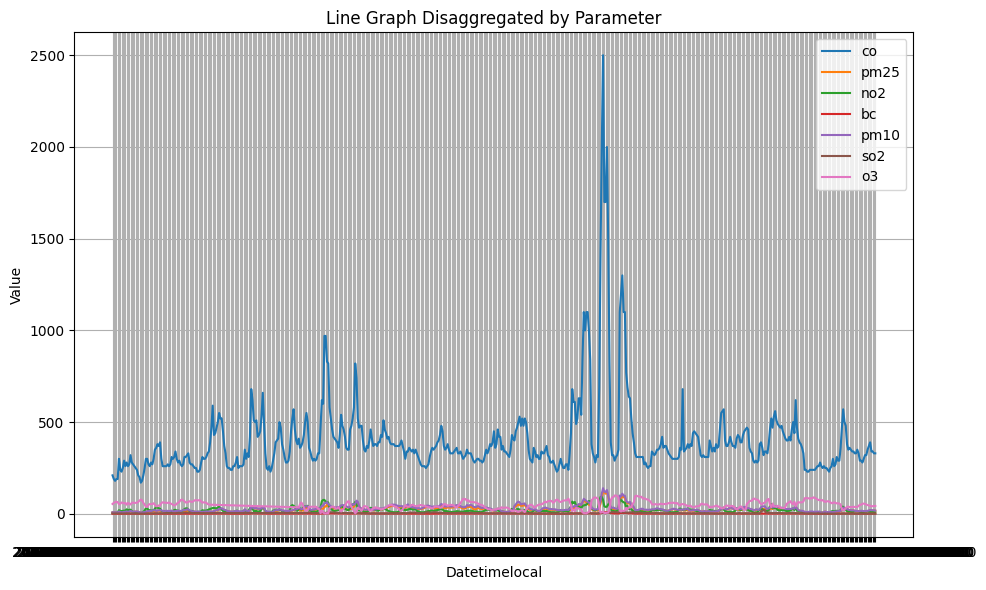

In [8]:
x_axis = 'datetimeLocal'
y_axis = 'value'
legend = 'parameter'

plot_line_graph(df, x_axis, y_axis, legend)


The amount of carbon (I) oxide in the atmosphere at Lublin in Poland peaked from March 8th at 5 PM to March 9th at 8 AM. This aligns with the Hindu festival of Mahashivratri Maha Shivratri which is celebrated on 8th and 9th of March. The amount peaks again to lesser degree from March 9th at 7 PM to March 10th at 1 AM. During this time, the devotees fast and light sacred fires. Combustion at times when incomplete releases carbon (I) oxide into the atmosphere. As a result, this event affected the amount of CO in the environment. Hence, in Lublin there is a notable Hindu population.

Notwithstanding, soon after the event ended the values of CO stabilised showing that the high CO levels were a seasonal rather than perennial matter. On the other hand, the other indicators of air pollution stay low and consistent. This indicates that Lublin has a solid system that keeps its air clean and pure.